# **Hand written digit Prediction**

-------------

## The digit dataset consist of 8x8 pixel images of digit. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualise the first 4 images. The target attribute of the dataset stores the digit each image represents. 

## Data Source: digit dataset 'load_digit' from sklearn library's datasets.

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Import Data**

In [4]:
from sklearn.datasets import load_digits
df=load_digits()


## **Describe Data**

In [9]:
df.images.shape

(1797, 8, 8)

In [10]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
df.images[0].shape

(8, 8)

## **Data Visualization**

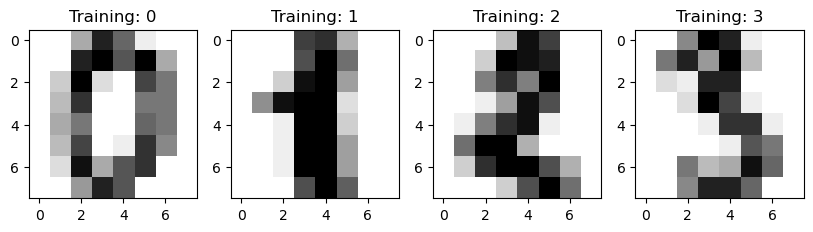

In [5]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image,label in zip(axes,df.images,df.target):
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training: %i"%label)

## **Data Preprocessing**

In [12]:
len(df.images)

1797

In [13]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

## **Scaling Image Data**

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data=data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split**

In [17]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling- Random Forest Model**

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf=RandomForestClassifier()

## **Model Evaluation**

In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier()

## **Prediction**

In [30]:
y_pred=rf.predict(X_test)

In [31]:
y_pred

array([8, 6, 2, 3, 2, 0, 4, 6, 8, 7, 3, 8, 2, 3, 3, 6, 7, 9, 5, 1, 1, 1,
       1, 8, 1, 6, 0, 6, 0, 0, 8, 1, 2, 7, 6, 2, 7, 6, 4, 8, 4, 9, 4, 7,
       9, 1, 3, 5, 3, 6, 7, 2, 4, 5, 9, 4, 4, 8, 9, 5, 5, 9, 8, 8, 9, 2,
       4, 2, 4, 1, 5, 4, 5, 7, 4, 6, 4, 5, 1, 2, 8, 6, 1, 4, 3, 3, 1, 1,
       2, 8, 8, 7, 1, 0, 6, 3, 8, 1, 1, 0, 7, 4, 5, 0, 8, 7, 2, 5, 9, 3,
       0, 6, 3, 0, 2, 7, 8, 4, 1, 2, 3, 9, 1, 7, 4, 6, 5, 6, 8, 2, 6, 2,
       6, 0, 3, 4, 7, 5, 6, 2, 7, 0, 5, 2, 2, 6, 3, 7, 1, 9, 7, 1, 6, 2,
       2, 0, 1, 6, 1, 6, 5, 3, 7, 1, 4, 3, 8, 7, 5, 2, 0, 8, 6, 1, 1, 6,
       8, 8, 6, 3, 8, 4, 0, 0, 2, 2, 2, 5, 9, 1, 8, 2, 7, 5, 0, 0, 2, 5,
       7, 5, 8, 4, 2, 8, 8, 0, 7, 8, 4, 4, 2, 3, 8, 3, 4, 1, 3, 4, 1, 5,
       2, 0, 1, 5, 4, 7, 2, 4, 6, 8, 7, 4, 4, 0, 3, 9, 4, 7, 1, 9, 1, 3,
       9, 9, 7, 5, 3, 4, 2, 3, 2, 4, 3, 9, 5, 9, 1, 6, 7, 9, 1, 9, 8, 3,
       6, 3, 5, 3, 5, 8, 5, 3, 5, 4, 4, 1, 2, 0, 6, 5, 9, 7, 0, 5, 6, 9,
       1, 3, 0, 7, 0, 2, 1, 6, 9, 8, 7, 5, 3, 3, 5,

## Model Accuracy

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
confusion_matrix(y_test,y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 54,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 54,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 59,  0,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 56,  0],
       [ 0,  1,  0,  1,  0,  2,  0,  0,  1, 42]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       0.96      1.00      0.98        55
           2       1.00      0.96      0.98        56
           3       0.96      0.96      0.96        56
           4       1.00      0.95      0.98        62
           5       0.95      1.00      0.97        54
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        51
           8       0.95      0.97      0.96        58
           9       0.95      0.89      0.92        47

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



## **Explaination**

Very first we import libraries required and the dataset from sklearn library. For better understanding of the data we describe the data inorder to know its shape and the fashion in which the data is stored. We visualise the data using matplotlib library and pyplot module. Then we reshape the data inorder to process the data well. After knowing the max of data we have scaled data to minimum. For training the data we have imported train_test_split model from sklearn and we've split the data. Since its a classification problem we've used random forest classifier model to train our data.